In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.decomposition
import sklearn.model_selection
import sklearn.tree
import sklearn.ensemble

In [138]:
X, y = sklearn.datasets.fetch_olivetti_faces(return_X_y=True, data_home='data')

In [3]:
X.shape

(400, 4096)

In [4]:
y.shape

(400,)

In [5]:
pca100 = sklearn.decomposition.PCA(n_components=10)
pca20 = sklearn.decomposition.PCA(n_components=1)

In [6]:
pca100.fit(X)
pca20.fit(X);

In [7]:
X_pca100 = pca100.transform(X)
X_pca20 = pca20.transform(X)
X_pca100.shape, X_pca20.shape

((400, 10), (400, 1))

In [8]:
X_rest100 = pca100.inverse_transform(X_pca100)
X_rest20 = pca20.inverse_transform(X_pca20)
X_rest100.shape, X_rest20.shape

((400, 4096), (400, 4096))

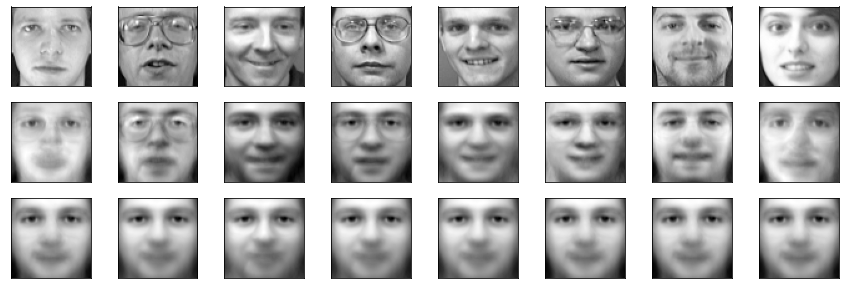

In [9]:
fig, axs = plt.subplots(3, 8, figsize=(15, 5))
for i in range(8):
    axs[0][i].imshow(X[i*10].reshape(64, 64), cmap=plt.cm.gray)
    axs[0][i].set_yticks([])
    axs[0][i].set_xticks([])
    axs[1][i].imshow(X_rest100[i*10].reshape(64, 64), cmap=plt.cm.gray)
    axs[1][i].set_yticks([])
    axs[1][i].set_xticks([])
    axs[2][i].imshow(X_rest20[i*10].reshape(64, 64), cmap=plt.cm.gray)
    axs[2][i].set_yticks([])
    axs[2][i].set_xticks([])

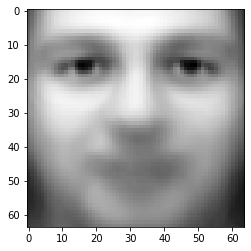

In [15]:
plt.imshow(pca100.mean_.reshape(64, 64), cmap=plt.cm.gray)

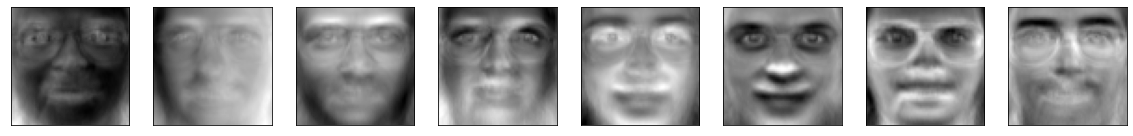

In [39]:
fig, axs = plt.subplots(1, 8, figsize=(20, 7))
for i in range(8):
    axs[i].imshow(pca100.components_[i].reshape(64, 64), cmap=plt.cm.gray)
    axs[i].set_yticks([])
    axs[i].set_xticks([])

# Classification

In [42]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
dtc = sklearn.tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train);
y_pred = dtc.predict(X_test)

Accuracy: 51.2%


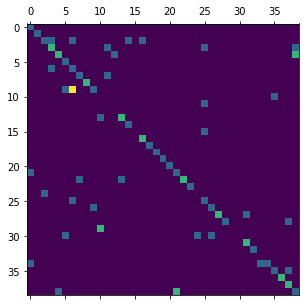

In [118]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_pred, y_test)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
print('Accuracy: {:.1%}'.format(1.-np.sum(y_pred != y_test) / X_test.shape[0]))
ax.matshow(confusion_matrix);

Accuracy: 58.8%


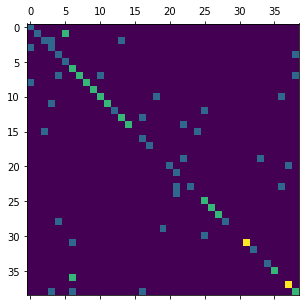

In [130]:
pca = sklearn.decomposition.PCA(n_components=10)
dtc2 = sklearn.tree.DecisionTreeClassifier()
dtc2.fit(pca.fit_transform(X_train), y_train)
y_pred = dtc2.predict(pca.transform(X_test))

confusion_matrix = sklearn.metrics.confusion_matrix(y_pred, y_test)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
print('Accuracy: {:.1%}'.format(1.-np.sum(y_pred != y_test) / X_test.shape[0]))
ax.matshow(confusion_matrix);

Accuracy: 91.2%


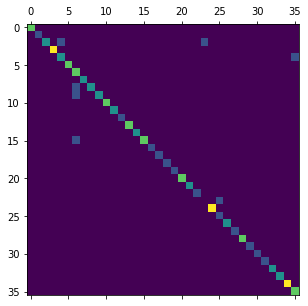

In [131]:
rfc = sklearn.ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

confusion_matrix = sklearn.metrics.confusion_matrix(y_pred, y_test)
fig, ax = plt.subplots(1,1,figsize=(5,5))
print('Accuracy: {:.1%}'.format(1.-np.sum(y_pred != y_test) / X_test.shape[0]))
ax.matshow(confusion_matrix);

Accuracy: 97.5%


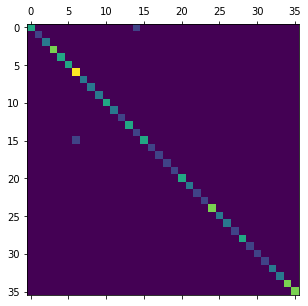

In [133]:
svc = sklearn.svm.SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

confusion_matrix = sklearn.metrics.confusion_matrix(y_pred, y_test)
fig, ax = plt.subplots(1,1,figsize=(5,5))
print('Accuracy: {:.1%}'.format(1.-np.sum(y_pred != y_test) / X_test.shape[0]))
ax.matshow(confusion_matrix);

# Completing faces

In [146]:
n = X.shape[1]
X_train = X[:320, :(X.shape[1] // 2)]
y_train = X[:320, (X.shape[1] // 2):]
X_test =  X[320:, :(X.shape[1] // 2)]
y_test =  X[320:, (X.shape[1] // 2):]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((320, 2048), (320, 2048), (80, 2048), (80, 2048))

In [147]:
lr = sklearn.linear_model.LinearRegression()

In [148]:
lr.fit(X_train, y_train)

LinearRegression()

In [149]:
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [162]:
sklearn.metrics.mean_squared_error(y_pred_train, y_train)

3.148455e-12

In [163]:
sklearn.metrics.mean_squared_error(y_pred, y_test)

0.03159528

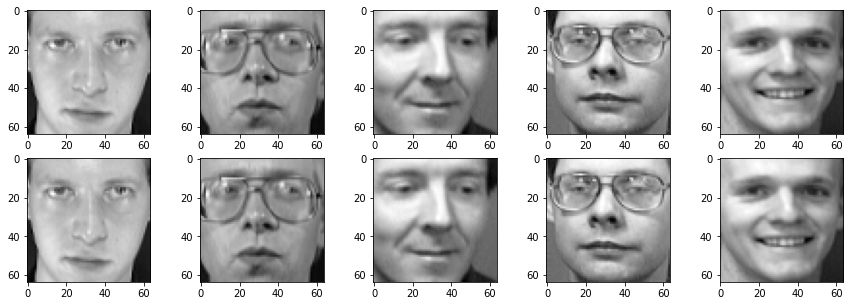

In [161]:
fig, axs = plt.subplots(2, 5, figsize=(15, 5))
for i in range(5):
    axs[0][i].imshow(X[i*10+2].reshape(64, 64), cmap=plt.cm.gray)
    axs[1][i].imshow(np.concatenate([X_train[i*10+2], y_pred_train[i*10+2]]).reshape(64, 64), cmap=plt.cm.gray)

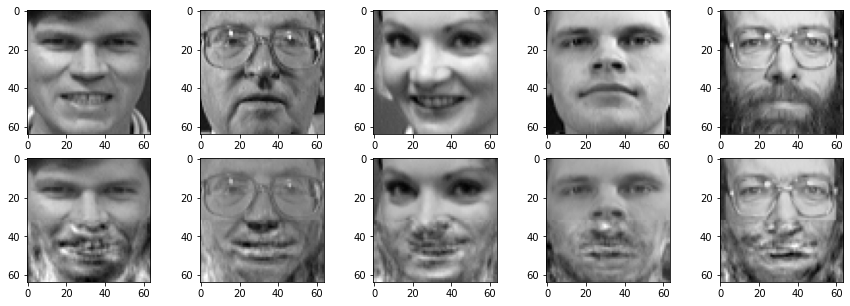

In [164]:
fig, axs = plt.subplots(2, 5, figsize=(15, 5))
for i in range(5):
    axs[0][i].imshow(X[320+i*10+2].reshape(64, 64), cmap=plt.cm.gray)
    axs[1][i].imshow(np.concatenate([X_test[i*10+2], y_pred[i*10+2]]).reshape(64, 64), cmap=plt.cm.gray)